# Import libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

from sklearn.model_selection import train_test_split


# Read dataset and visualize table

In [26]:
# Importing dataset
dataset = pd.read_csv("data.csv")

# Visualizing table
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dataset info

In [27]:
dataset.info()
# columns "id" and "Unnamed: 32" are not useful -> get rid of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

# Class distribution 

Text(0, 0.5, 'Quantity')

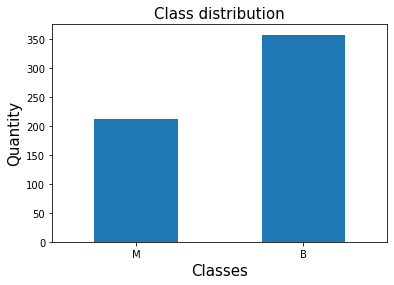

In [34]:
# Class distribution
dataset.diagnosis.value_counts(sort=False).plot(kind='bar')
plt.title('Class distribution', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.xticks(rotation=360)
plt.ylabel('Quantity', fontsize = 15)

# Prediction tree

In [35]:
X = dataset.drop('diagnosis', axis=1)
Y = dataset['diagnosis']

In [36]:
# creating test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 14)
print("Train dataset shape: ", X_train.shape)
print("Test dataset shape: ", X_test.shape)

Train dataset shape:  (455, 30)
Test dataset shape:  (114, 30)


Training set accuracy: 100.0000
Test set accuracy: 92.9825


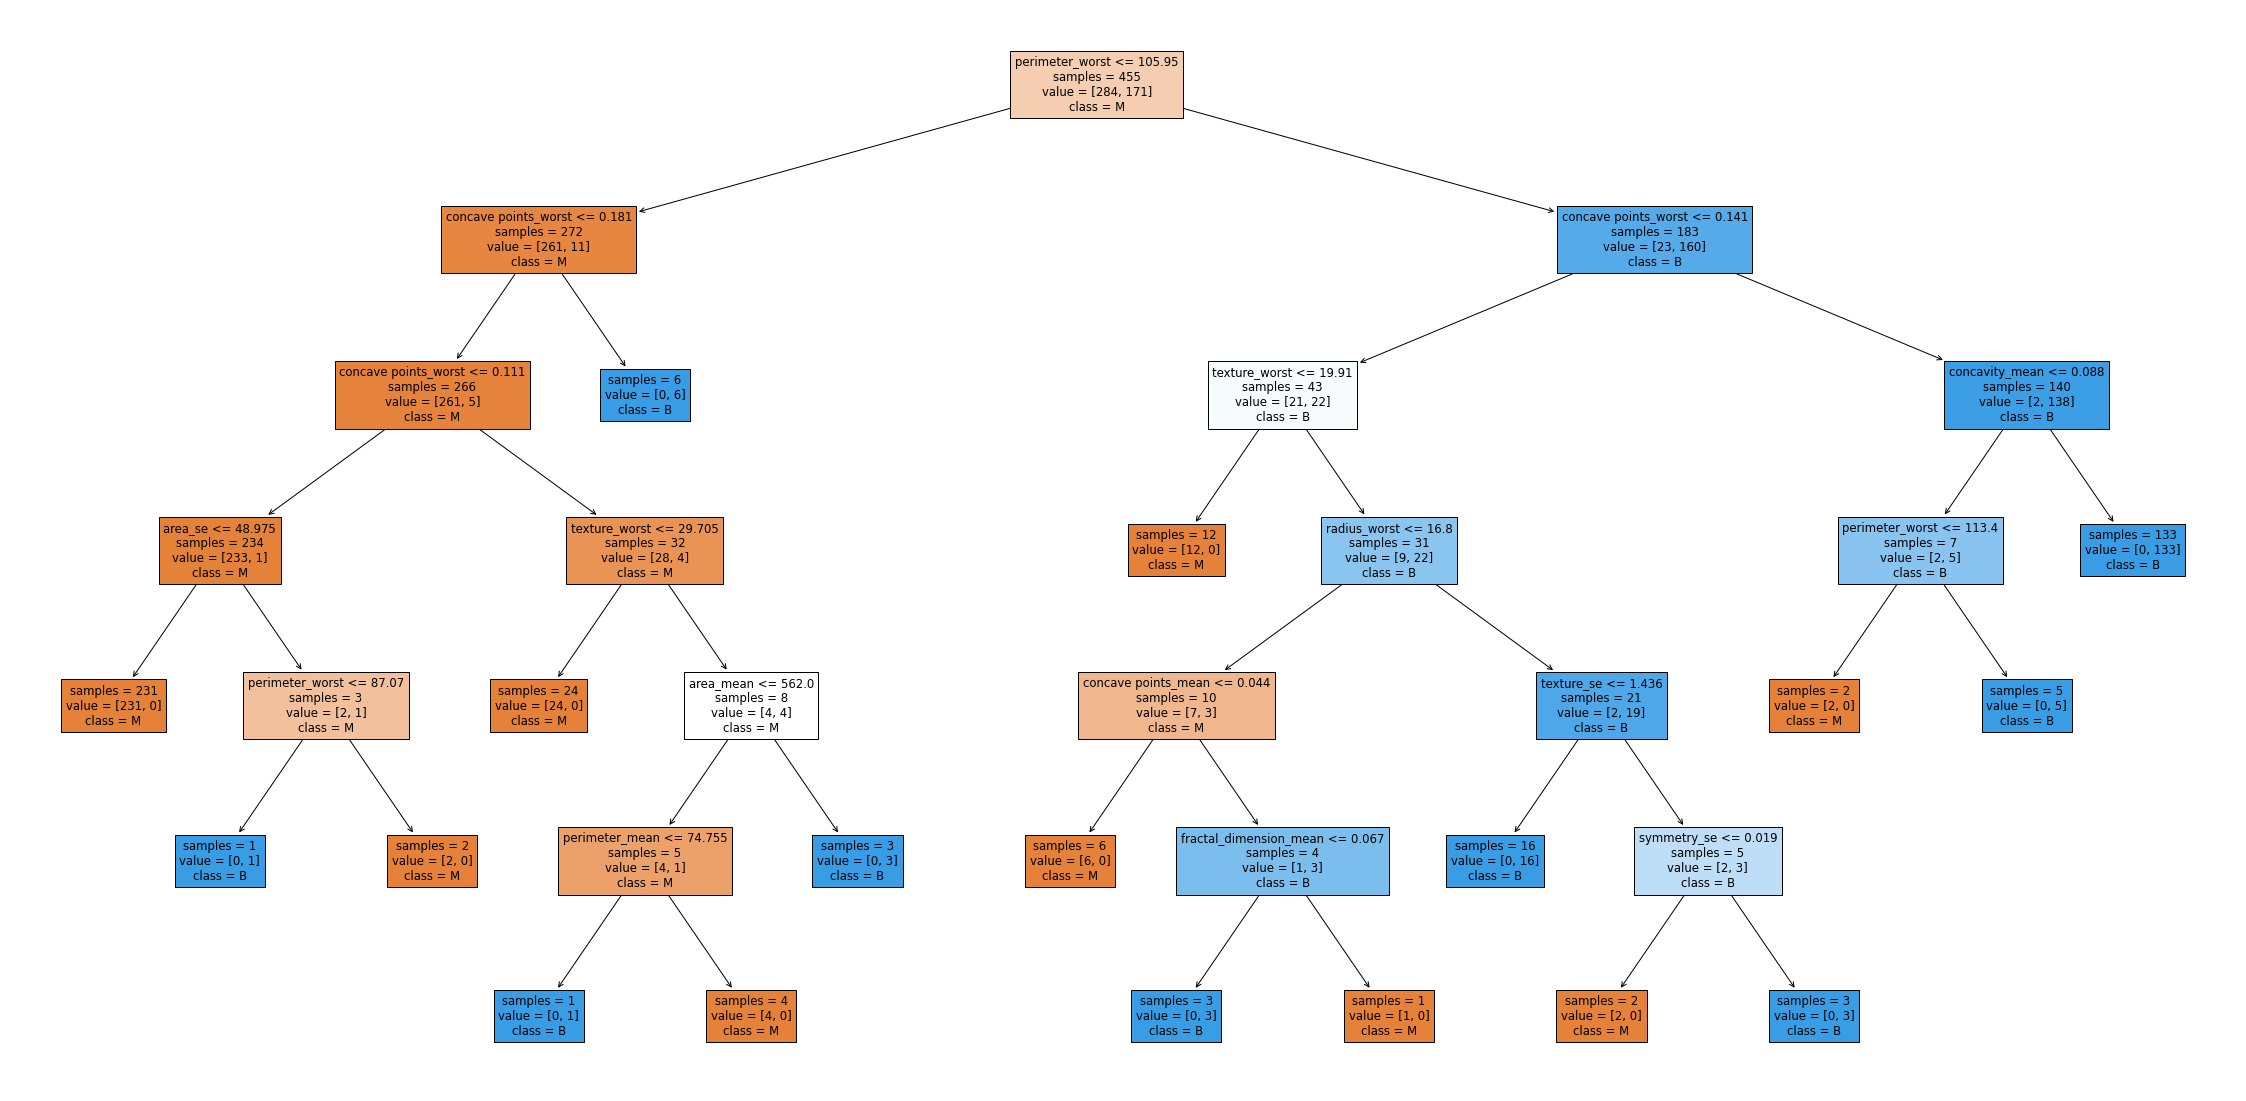

In [37]:
model = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', random_state = 50)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print('Training set accuracy: {:.4f}'.format(model.score(X_train, Y_train) * 100))
print('Test set accuracy: {:.4f}'.format(model.score(X_test, Y_test) * 100))


fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=list(X.columns.values),  class_names=['M', 'B'], filled=True, impurity = False)

# Feature importances

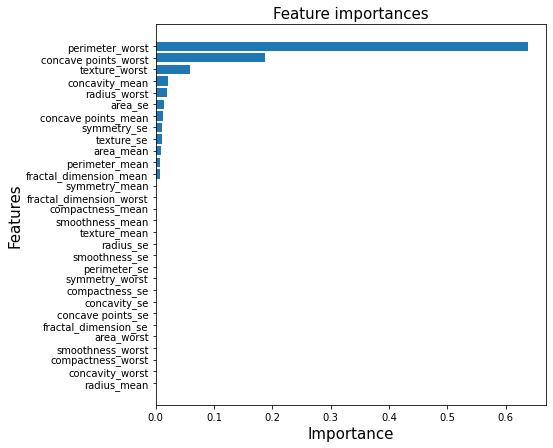

In [38]:
tree_importances = model.feature_importances_
indices = np.argsort(tree_importances)

fig, ax = plt.subplots(figsize = (7,7))
ax.barh(range(len(tree_importances)), tree_importances[indices])
ax.set_yticks(range(len(tree_importances)))
ax.set_title('Feature importances', fontsize=15)
ax.set_xlabel('Importance', fontsize=15)
ax.set_ylabel('Features', fontsize=15)
ax.set_yticklabels(np.array(X_train.columns)[indices])